In [ ]:
!pip install kaggle  ##installing the kaggle module

In [2]:
#configuring the path of kaggle.json file  
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c quora-question-pairs

 95% 292M/309M [00:01<00:00, 197MB/s]
100% 309M/309M [00:01<00:00, 169MB/s]


In [4]:
##extracting all the files from zipfile
from zipfile import ZipFile       
dataset = '/content/quora-question-pairs.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

kaggle.json		  sample_submission.csv.zip  train.csv.zip
quora-question-pairs.zip  test.csv
sample_data		  test.csv.zip


In [6]:
##extracting the train.csv
dataset = '/content/train.csv.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

kaggle.json		  sample_submission.csv.zip  train.csv
quora-question-pairs.zip  test.csv		     train.csv.zip
sample_data		  test.csv.zip


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('train.csv')

Exploratory Data Analysis

In [12]:
df.shape

(404290, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [13]:
df.sample(5)  ##random sample

,id,qid1,qid2,question1,question2,is_duplicate
362107,362107,31392,492003,Does blocking someone from Instagram cause the...,If someone unfollowed me on instagram why woul...,0
308950,308950,432867,432868,How can I avoid getting small bumps in my earl...,How can small bumps in my earlobes be treated?,0
37091,37091,67545,10958,If I can find all answers on Google then why s...,Why do we need to use Quora when we have Googl...,1
134745,134745,215304,215305,How do I find pro bono disability lawyers?,How can I find a pro bono lawyer?,0
214654,214654,320304,320305,Why did the US get involved in WW2?,How would WW2 have gone differently if the USA...,0


In [14]:
df.isnull().sum()  ##check null values

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [45]:
df.dropna()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


Observation - Null values are present and it should be handeled.
*   Drop na values as very few NA values.




In [17]:
df.duplicated().sum()   ##check duplicate values

0

In [18]:
df['is_duplicate'].value_counts()   ##checking the distribution of dataset

0    255027
1    149263
Name: is_duplicate, dtype: int64

<Axes: >

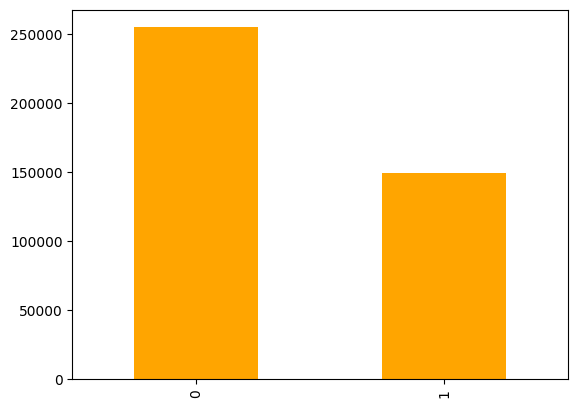

In [29]:
df['is_duplicate'].value_counts().plot(kind='bar',color='orange') 

Observation- Dataset is Imbalanced as we have more data of class 0.

**Solution**
1. F1 score as evaluation metrics
2. Resampling
3. SMOTE
4. Use balance bagging classifier



In [46]:
##resampling the dataset 
from sklearn.utils import resample
df_majority = df[df['is_duplicate']==0]
df_minority = df[df['is_duplicate']==1]
##down sampling the majority dataset
df_majority_downsample = resample(
    df_majority,
    replace =True,
    n_samples=149263,  ##to match with minority class
    random_state=3,)
df_downsampled = pd.concat([df_majority_downsample,df_minority])

In [47]:
df_downsampled['is_duplicate'] .value_counts()

0    149263
1    149263
Name: is_duplicate, dtype: int64

Data is now perfectly balanced as everything should be.

In [31]:
##repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions:-',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of repeated question:-',x[x].shape[0])

Number of unique questions:- 537933
Number of repeated question:- 111780


<function matplotlib.pyplot.show(close=None, block=None)>

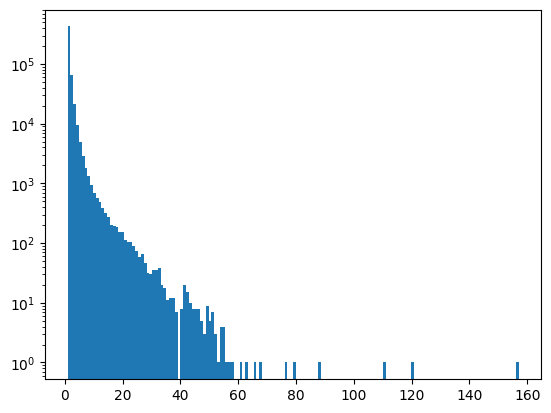

In [39]:
##repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show

Feature Engineering
1. Length of Questions 
2. Number of words in Questions
3. Number of common words
4. Total number of words in Q1 and Q2
5. Word share =  Word common / Word total  

In [52]:
new_df=df_downsampled.sample(50000)

In [54]:
new_df['is_duplicate'].value_counts()

0    25074
1    24926
Name: is_duplicate, dtype: int64

In [55]:
new_df.to_csv('sample.csv')